# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [3]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 27.505, 即時現金賣出: 28.175


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [18]:
'''

  Your code here
  
'''

url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

soup=BeautifulSoup(resp.text,"lxml")
rate_table = html.find('table',attrs={'title':'牌告匯率'}).find('tbody').find_all('tr')

for b in rate_table :
    print(b.find('div',class_='visible-phone print_hide').text.replace(" ",""))
    buy_in = b.find('td',attrs={'data-table':'本行現金買入'}).text.replace(" ","")
    sell_out = b.find('td',attrs={'data-table':'本行現金賣出'}).text.replace(" ","")
    print("買入匯率:",buy_in, "賣出匯率:",sell_out)


美金(USD)

買入匯率: 27.505 賣出匯率: 28.175

港幣(HKD)

買入匯率: 3.44 賣出匯率: 3.644

英鎊(GBP)

買入匯率: 37.5 賣出匯率: 39.62

澳幣(AUD)

買入匯率: 21.3 賣出匯率: 22.08

加拿大幣(CAD)

買入匯率: 21.99 賣出匯率: 22.9

新加坡幣(SGD)

買入匯率: 20.46 賣出匯率: 21.37

瑞士法郎(CHF)

買入匯率: 29.65 賣出匯率: 30.85

日圓(JPY)

買入匯率: 0.2481 賣出匯率: 0.2609

南非幣(ZAR)

買入匯率: - 賣出匯率: -

瑞典幣(SEK)

買入匯率: 2.93 賣出匯率: 3.45

紐元(NZD)

買入匯率: 19.63 賣出匯率: 20.48

泰幣(THB)

買入匯率: 0.761 賣出匯率: 0.951

菲國比索(PHP)

買入匯率: 0.5026 賣出匯率: 0.6356

印尼幣(IDR)

買入匯率: 0.00158 賣出匯率: 0.00228

歐元(EUR)

買入匯率: 32.86 賣出匯率: 34.2

韓元(KRW)

買入匯率: 0.02335 賣出匯率: 0.02725

越南盾(VND)

買入匯率: 0.00082 賣出匯率: 0.00132

馬來幣(MYR)

買入匯率: 5.699 賣出匯率: 7.324

人民幣(CNY)

買入匯率: 4.207 賣出匯率: 4.369


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)

          date  buy_rate  sell_rate
0   2021/04/28    27.530     28.200
1   2021/04/27    27.500     28.170
2   2021/04/26    27.550     28.220
3   2021/04/23    27.690     28.360
4   2021/04/22    27.715     28.385
5   2021/04/21    27.740     28.410
6   2021/04/20    27.720     28.390
7   2021/04/19    27.785     28.455
8   2021/04/16    27.930     28.600
9   2021/04/15    27.960     28.630
10  2021/04/14    28.035     28.705
11  2021/04/13    28.065     28.735
12  2021/04/12    28.055     28.725
13  2021/04/09    28.030     28.700
14  2021/04/08    28.020     28.690
15  2021/04/07    28.020     28.690
16  2021/04/06    28.085     28.755
17  2021/04/01    28.125     28.795
            buy_rate  sell_rate
date                           
2021/04/01    28.125     28.795
2021/04/06    28.085     28.755
2021/04/07    28.020     28.690
2021/04/08    28.020     28.690
2021/04/09    28.030     28.700
2021/04/12    28.055     28.725
2021/04/13    28.065     28.735
2021/04/14    28.0

<Figure size 720x576 with 0 Axes>

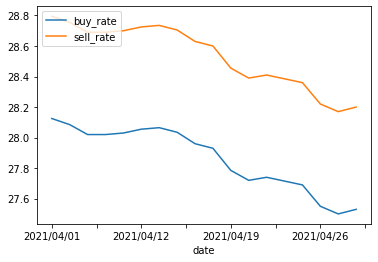

In [55]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2021-04")
#quote_history_url = history_rate_link.replace("?Lang=zh-TW", "")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
#print(resp.text)
history = BeautifulSoup(resp.text, "lxml")
#history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
history_table = history.find(name='tbody').find_all('tr')
#print(history.find(name='tbody').find('td',attrs={'class':'rate-content-cash text-right print_table-cell'}).text)

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    #date_string = history_rate.a.get_text()
    #date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    #date_history.append(date)  # 日期歷史資料
    #print(history_rate)
    date_string = history_rate.find('a').text
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')
    date_history.append(date)

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
#print(date_history)
#print(history_buy)
#print(history_sell)

HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})
#print(HistoryExchangeRate)

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

print(HistoryExchangeRate)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

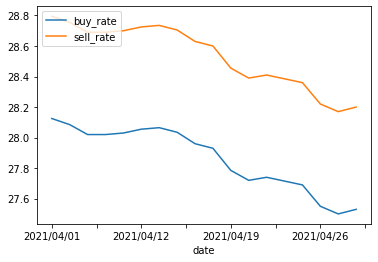


港幣(HKD)



<Figure size 720x576 with 0 Axes>

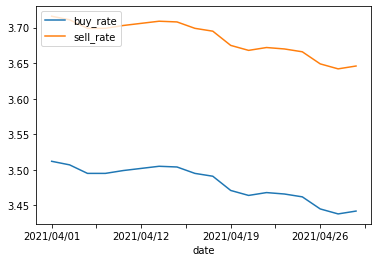


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

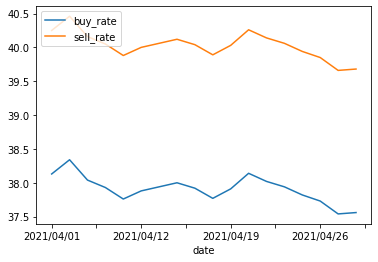


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

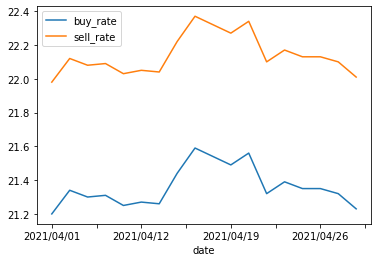


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

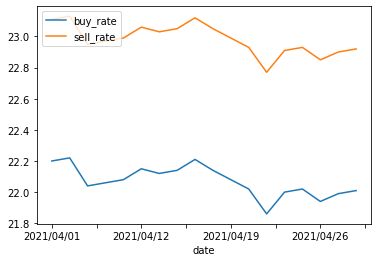


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

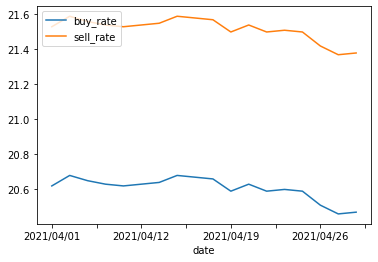


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

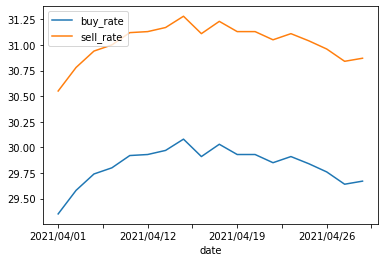


日圓(JPY)



<Figure size 720x576 with 0 Axes>

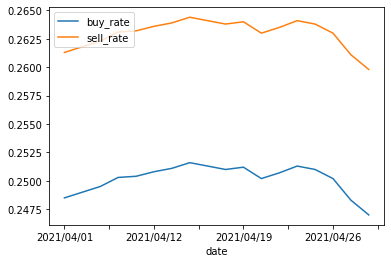


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

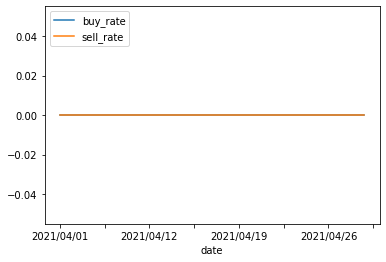


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

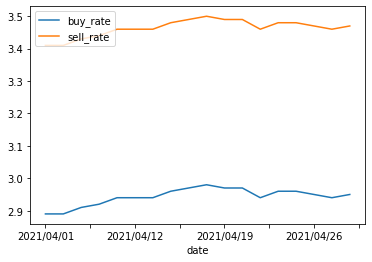


紐元(NZD)



<Figure size 720x576 with 0 Axes>

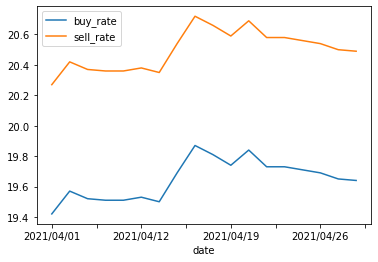


泰幣(THB)



<Figure size 720x576 with 0 Axes>

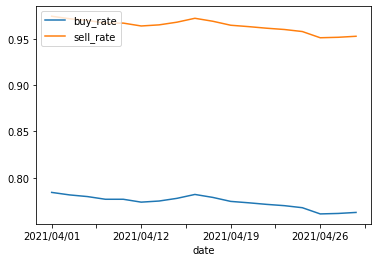


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

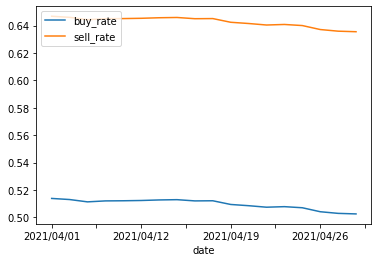


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

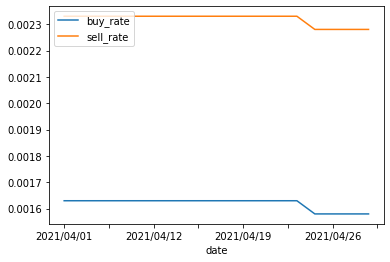


歐元(EUR)



<Figure size 720x576 with 0 Axes>

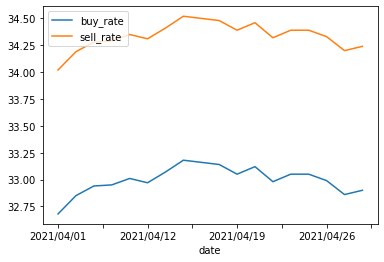


韓元(KRW)



<Figure size 720x576 with 0 Axes>

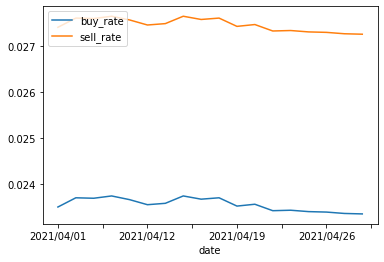


越南盾(VND)



<Figure size 720x576 with 0 Axes>

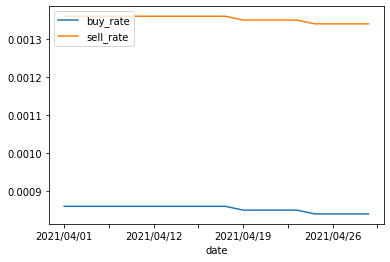


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

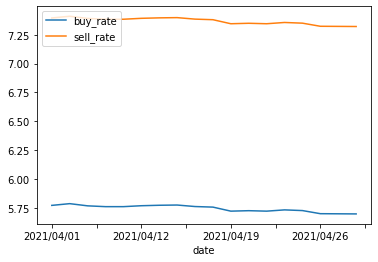


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

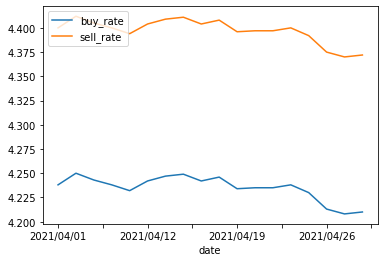

In [130]:
'''

  Your code here

'''
import re

url='https://rate.bot.com.tw/xrt'
resp=requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")

table_rate = html.find('tbody') #進入牌照匯率
for name in table_rate.find_all('tr') : #取得各國英文簡寫
    country_name=name.find('div',class_="visible-phone print_hide").text.replace(" ","")
    #print(country_name)
    country_name=re.findall('[A-Z]+',country_name)[0]
    #print(country_name)
    url_monthly = url + "/quote/" + "2021-04/" + country_name  #取得各國月匯率網址
    #print(url_monthly)
    resp=requests.get(url_monthly)
    #resp.encoding = 'utf-8'
    monthly_rate = BeautifulSoup(resp.text,"lxml").find('tbody')
    #print(monthly_rate)
    
    date_history = list()
    history_buy = list()
    history_sell = list()
    
    
    for d in monthly_rate.find_all('tr') :
        date_string = d.find('a').text
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')
        date_history.append(date)

        history_ex_rate = d.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})
    #print(date_history)
    #print(history_buy)
    #print(history_sell)

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    print(name.find('div',class_="visible-phone print_hide").text.replace(" ",""))
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()